# Clusterização Hierárquica - Exercícios

Repositório original com conteúdo teórico:  
https://github.com/silvaan/unsupervised-learning/blob/main/03%20-%20Hierarchical.ipynb

In [26]:
# Célula de importação de bibliotecas

import numpy as np
import pandas as pd
from scipy.stats import mode
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## Exercícios

### Exercício 1: Implementação do Average Linkage

Complete a implementação da nossa classe `HierarchicalClustering` adicionando o método **Average Linkage**. Em seguida, teste todos os três métodos de ligação (single, complete, average) no dataset simples (`X_simple`) e compare os resultados.

#### Classe HierarchicalClustering com a implementação do método Average Linkage

In [27]:
class HierarchicalClustering:
    def __init__(self, linkage='single'):
        """
        Inicializa o algoritmo de clusterização hierárquica.

        Parameters:
        linkage: str, critério de ligação ('single', 'complete', 'average')
        """
        self.linkage = linkage
        self.merge_history = []
        self.distances = []

    def _calculate_distance_matrix(self, X):
        """
        Calcula a matriz de distâncias entre todos os pares de pontos.
        """
        n = len(X)
        dist_matrix = np.zeros((n, n))

        for i in range(n):
            for j in range(i+1, n):
                dist = np.linalg.norm(X[i] - X[j])
                dist_matrix[i, j] = dist
                dist_matrix[j, i] = dist

        return dist_matrix

    def _cluster_distance(self, cluster1, cluster2, X, dist_matrix):
        """
        Calcula a distância entre dois clusters baseado no critério de ligação.
        """
        if self.linkage == 'single':
            # Distância mínima entre qualquer par de pontos dos clusters
            min_dist = float('inf')
            for i in cluster1:
                for j in cluster2:
                    if dist_matrix[i, j] < min_dist:
                        min_dist = dist_matrix[i, j]
            return min_dist

        elif self.linkage == 'complete':
            # Distância máxima entre qualquer par de pontos dos clusters
            max_dist = 0
            for i in cluster1:
                for j in cluster2:
                    if dist_matrix[i, j] > max_dist:
                        max_dist = dist_matrix[i, j]
            return max_dist

        elif self.linkage == 'average':
            # Distância média entre todos os pares de pontos dos clusters
            mean_dist = 0
            sum_dist = 0
            total_num_of_elements = len(cluster1) * len(cluster2)
            for i in cluster1:
              for j in cluster2:
                sum_dist += dist_matrix[i, j]

            mean_dist = sum_dist * (1/total_num_of_elements)
            return mean_dist

    def fit(self, X):
        """
        Executa o algoritmo de clusterização hierárquica aglomerativa.
        """
        n = len(X)

        # Inicializar cada ponto como um cluster
        clusters = [[i] for i in range(n)]

        # Calcular matriz de distâncias inicial
        dist_matrix = self._calculate_distance_matrix(X)

        self.merge_history = []
        self.distances = []

        step = 0
        print(f"Passo inicial: {len(clusters)} clusters individuais")
        print(f"Clusters: {clusters}\n")

        # Continuar até que reste apenas um cluster
        while len(clusters) > 1:
            # Encontrar o par de clusters mais próximo
            min_distance = float('inf')
            merge_i, merge_j = -1, -1

            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    distance = self._cluster_distance(clusters[i], clusters[j], X, dist_matrix)
                    if distance < min_distance:
                        min_distance = distance
                        merge_i, merge_j = i, j

            # Combinar os clusters mais próximos
            new_cluster = clusters[merge_i] + clusters[merge_j]

            # Salvar informações da fusão
            self.merge_history.append((clusters[merge_i].copy(), clusters[merge_j].copy()))
            self.distances.append(min_distance)

            step += 1
            print(f"Passo {step}: Combinar clusters {clusters[merge_i]} e {clusters[merge_j]}")
            print(f"Distância: {min_distance:.3f}")

            # Remover os clusters antigos e adicionar o novo
            clusters = [clusters[k] for k in range(len(clusters)) if k != merge_i and k != merge_j]
            clusters.append(new_cluster)

            print(f"Clusters restantes: {clusters}\n")

#### Comparação dos resultados entre os três métodos de ligação (single, complete e average)

In [28]:
X_simple = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

print("Clusterização hierárquica com ligação simples")
hc_single = HierarchicalClustering(linkage='single')
hc_single.fit(X_simple)

print("\nClusterização hierárquica com ligação completa")
hc_complete = HierarchicalClustering(linkage='complete')
hc_complete.fit(X_simple)

print("\nClusterização hierárquica com ligação média")
hc_average = HierarchicalClustering(linkage='average')
hc_average.fit(X_simple)

Clusterização hierárquica com ligação simples
Passo inicial: 6 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5]]

Passo 1: Combinar clusters [0] e [1]
Distância: 0.539
Clusters restantes: [[2], [3], [4], [5], [0, 1]]

Passo 2: Combinar clusters [4] e [0, 1]
Distância: 1.300
Clusters restantes: [[2], [3], [5], [4, 0, 1]]

Passo 3: Combinar clusters [2] e [3]
Distância: 3.000
Clusters restantes: [[5], [4, 0, 1], [2, 3]]

Passo 4: Combinar clusters [5] e [2, 3]
Distância: 3.162
Clusters restantes: [[4, 0, 1], [5, 2, 3]]

Passo 5: Combinar clusters [4, 0, 1] e [5, 2, 3]
Distância: 7.120
Clusters restantes: [[4, 0, 1, 5, 2, 3]]


Clusterização hierárquica com ligação completa
Passo inicial: 6 clusters individuais
Clusters: [[0], [1], [2], [3], [4], [5]]

Passo 1: Combinar clusters [0] e [1]
Distância: 0.539
Clusters restantes: [[2], [3], [4], [5], [0, 1]]

Passo 2: Combinar clusters [4] e [0, 1]
Distância: 1.400
Clusters restantes: [[2], [3], [5], [4, 0, 1]]

Passo 3: Combinar c

### Exercício 2: Análise do Dataset Wine - Seleção de Features e Comparação de Métodos

Aplique a clusterização hierárquica do SciPy ao dataset Wine. Primeiro, você deve selecionar um bom par de features para visualização bidimensional, depois comparar diferentes métodos de ligação.

**Tarefas:**
1. Carregue o dataset Wine e explore suas features
2. Selecione as duas melhores features para visualização (analise correlações, variâncias, etc.)
3. Aplique os 4 métodos de ligação ('single', 'complete', 'average', 'ward') usando `scipy.cluster.hierarchy.linkage`
4. Crie dendrogramas para cada método
5. Determine visualmente qual método produz a melhor separação

In [29]:
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

print("Dataset Wine:")
print(f"Shape: {X_wine.shape}")
print(f"Features: {wine.feature_names}")
print(f"Classes: {wine.target_names}")

Dataset Wine:
Shape: (178, 13)
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


In [30]:
# 2. Análise das features para seleção
df_wine = pd.DataFrame(X_wine, columns=wine.feature_names)

variancias = df_wine.var().sort_values()

print("Análise de variância das features (das menores para as maiores)")
print(variancias)

Análise de variância das features (das menores para as maiores)
nonflavanoid_phenols                0.015489
hue                                 0.052245
ash                                 0.075265
proanthocyanins                     0.327595
total_phenols                       0.391690
od280/od315_of_diluted_wines        0.504086
alcohol                             0.659062
flavanoids                          0.997719
malic_acid                          1.248015
color_intensity                     5.374449
alcalinity_of_ash                  11.152686
magnesium                         203.989335
proline                         99166.717355
dtype: float64


In [31]:
# Note que as maiores variâncias foram das features "magnesium" e "proline"
# Assim, observando a correlação entre elas, de maneira a verificar se possuem alta correlação entre si:

correlacoes = df_wine.corr()

print("Correlação entre as features \"magnesium\" e \"proline\"")
print(f"{correlacoes.loc['magnesium', 'proline']:.3f}")

Correlação entre as features "magnesium" e "proline"
0.393


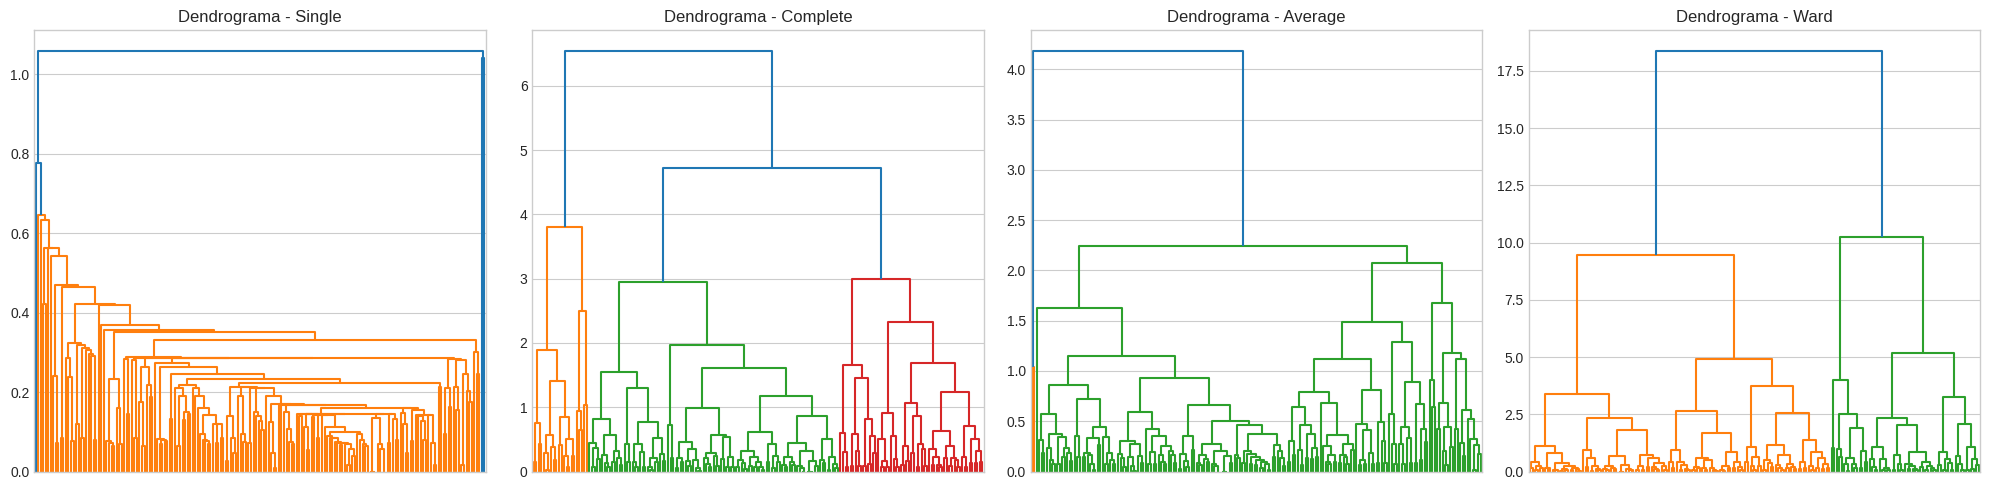

In [32]:
# 3. Seleção das duas melhores features
df_wine_selecionados = df_wine[["magnesium", "proline"]]

scaler = StandardScaler()
X_wine_selecionados = scaler.fit_transform(df_wine_selecionados.to_numpy())

# 4. Aplicação dos métodos de ligação e criação dos dendrogramas
methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, method in enumerate(methods):
    linkage_matrix = linkage(X_wine_selecionados, method=method)

    # Dendrograma
    dendrogram(linkage_matrix, ax=axes[i], no_labels=True)
    axes[i].set_title(f'Dendrograma - {method.capitalize()}')

plt.tight_layout()
plt.show()

5. Análise visual e determinação do melhor método

Visualmente, o método "complete" parece ter produzido a melhor separação, pois possuia 3 clusters bem espalhados aproximadamente na metade da altura do dendrograma, enquanto os outros apresentam menos clusters ou mais.

### Exercício 3: Determinação do Número Ótimo de Clusters

Com base no melhor método de ligação identificado no Exercício 2, determine o número ótimo de clusters para o dataset Wine usando análise visual do dendrograma e validação com os rótulos verdadeiros.

**Tarefas:**
1. Use o melhor método identificado no exercício anterior
2. Crie um dendrograma detalhado com linha de corte ajustável
3. Teste diferentes números de clusters (2, 3, 4, 5) usando `fcluster`
4. Para cada número de clusters, visualize os clusters no scatter plot
5. Determine o número ótimo de clusters justificando sua escolha

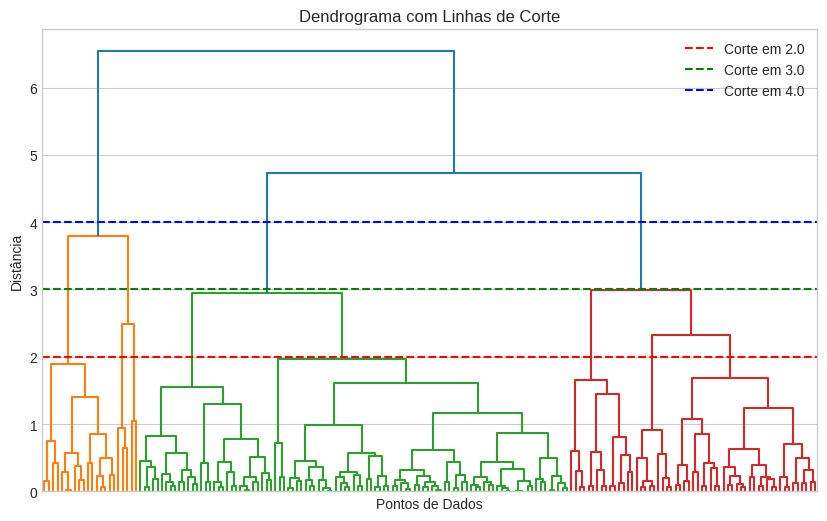

In [33]:
# Exercício 3: Determinação do Número Ótimo de Clusters

# 1. Use o melhor método do exercício anterior
best_method = 'complete'

# 2. Crie dendrograma com diferentes linhas de corte

linkage_matrix = linkage(X_wine_selecionados, method=best_method)

cut_heights = [2.0, 3.0, 4.0]
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, no_labels=True)

for height, color in zip(cut_heights, colors):
    plt.axhline(y=height, color=color, linestyle='--', label=f'Corte em {height}')

plt.title('Dendrograma com Linhas de Corte')
plt.xlabel('Pontos de Dados')
plt.ylabel('Distância')
plt.legend()
plt.show()

In [34]:
def calculate_purity(y_true, y_pred):
    """
    Calcula a pureza dos clusters comparando com os rótulos verdadeiros.
    """
    correct_predictions = 0
    n_samples = len(y_true)

    for cluster_id in np.unique(y_pred):
        mask = (y_pred == cluster_id)
        if np.sum(mask) > 0:
            dominant_label = mode(y_true[mask], keepdims=True)[0][0]
            correct_predictions += np.sum(y_true[mask] == dominant_label)

    return correct_predictions / n_samples

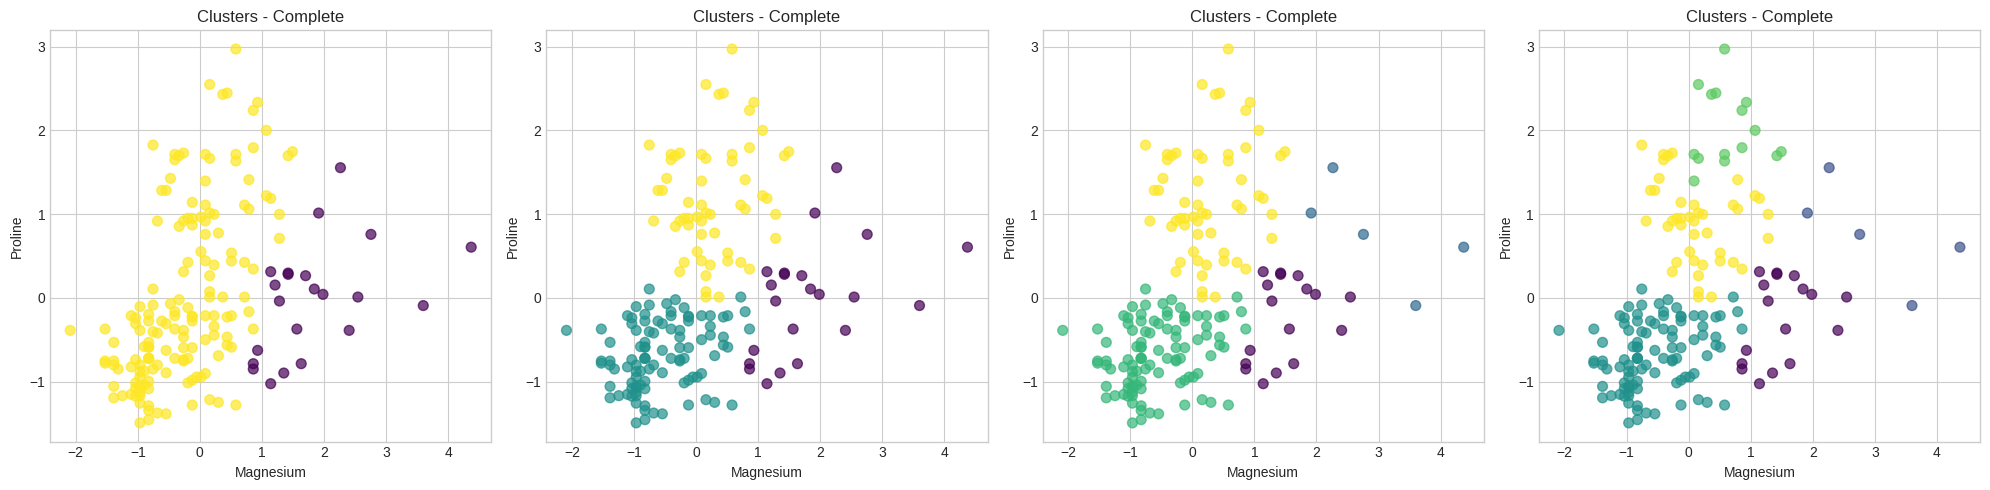


Análise do número ótimo de clusters:
Utilizando o método complete
2 clusters: 40.4% de acertos. Clusters 1: 22, Clusters 2: 156
3 clusters: 67.4% de acertos. Clusters 1: 22, Clusters 2: 99, Clusters 3: 57
4 clusters: 68.5% de acertos. Clusters 1: 17, Clusters 2: 5, Clusters 3: 99, Clusters 4: 57
5 clusters: 68.5% de acertos. Clusters 1: 17, Clusters 2: 5, Clusters 3: 99, Clusters 4: 15, Clusters 5: 42

Um número ótimo de clusters é 3, considerando a porcentagem de acertos e também que todos os clusters possuem um número decente de elementos,
enquanto que ao utilizar 4 ou 5 clusters são gerados clusters com relativamente poucos elementos.


In [35]:
# 3. Teste diferentes números de clusters

n_clusters_to_test = [2, 3, 4, 5]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, n_clusters in enumerate(n_clusters_to_test):
    linkage_matrix = linkage(X_wine_selecionados, method=best_method)

    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

    # Plotar os clusters
    scatter = axes[i].scatter(X_wine_selecionados[:, 0], X_wine_selecionados[:, 1], c=clusters, s=50, alpha=0.7, cmap='viridis')
    axes[i].set_title(f'Clusters - {best_method.capitalize()}')
    axes[i].set_xlabel('Magnesium')
    axes[i].set_ylabel('Proline')

plt.tight_layout()
plt.show()

print("\nAnálise do número ótimo de clusters:")
print("=" * 40)

print(f"Utilizando o método {best_method}")
for n_clusters in n_clusters_to_test:
    linkage_matrix = linkage(X_wine_selecionados, method=best_method)
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    purity = calculate_purity(y_wine, clusters)

    counts = np.bincount(clusters)[1:]

    counts_str = ", ".join(f"Clusters {i+1}: {count}" for i, count in enumerate(counts))

    print(f"{n_clusters} clusters: {purity:.1%} de acertos. {counts_str}")

print("\nUm número ótimo de clusters é 3, considerando a porcentagem de acertos e também que todos os clusters possuem um número decente de elementos,")
print("enquanto que ao utilizar 4 ou 5 clusters são gerados clusters com relativamente poucos elementos.")